In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Global_tomerge as global_nav
import Global_display_functions as plt_glob
from IPython.display import Image
import matplotlib.image as mpimg
import math
import random

Setting Parameters to display

In [8]:
#object_corners = {
    #'Quadrilateral_1': [(53, 107), (107, 107), (107, 53), (53, 53)],
    #'Quadrilateral_2': [(120, 200), (200, 280), (280, 200), (200, 120)],
    #'Quadrilateral_3': [(243, 87), (297, 87), (297, 33), (243, 33)]
#}
RandG ={'robot': (-44.1586306628488, -12.749089520018597), 'goal': (36.12167300380228, 23.954372623574145)}
object_corners ={'object_1': [(-4.780114722753346, 113.95793499043977), (-4.780114722753346, 77.05544933078394), (-7.648183556405353, 77.05544933078394), (-7.648183556405353, 113.95793499043977)], 'object_2': [(8.221797323135755, 113.0019120458891), (4.780114722753346, 113.0019120458891), (4.780114722753346, 113.95793499043977), (8.221797323135755, 113.95793499043977)], 'object_3': [(21.797323135755256, 31.166347992351817), (21.41491395793499, 22.753346080305928), (8.604206500956023, 23.326959847036328), (8.98661567877629, 31.739961759082217)], 'object_4': [(21.988527724665392, 90.82217973231357), (21.797323135755256, 81.83556405353728), (7.456978967495219, 82.21797323135755), (7.648183556405353, 91.20458891013384)], 'object_5': [(43.21223709369025, 63.2887189292543), (42.82982791586998, 49.139579349904395), (23.709369024856596, 49.521988527724666), (24.091778202676863, 63.862332695984705)], 'object_6': [(57.36137667304015, 109.94263862332696), (42.82982791586998, 109.94263862332696), (42.82982791586998, 113.95793499043977), (57.36137667304015, 113.95793499043977)], 'object_7': [(70.17208413001912, 111.28107074569789), (70.36328871892925, 111.28107074569789), (70.36328871892925, 111.28107074569789), (70.17208413001912, 111.28107074569789)], 'object_8': [(71.70172084130019, 27.533460803059274), (71.12810707456978, 9.751434034416826), (53.53728489483748, 10.325047801147226), (54.11089866156787, 28.107074569789674)], 'object_9': [(71.89292543021033, 74.37858508604207), (60.61185468451243, 74.37858508604207), (60.61185468451243, 85.27724665391969), (71.89292543021033, 85.27724665391969)]}

#object_corners = global_nav.create_dictionnary(object)

#robot = (50,15)
#goal = (255, 250)

#RandG = global_nav.create_RandG_dict(robot, goal)

robot_size = 6

The function grow obstacles is diffine for quadrilaterals since we had already decided to use only quadrilaterals as obstacles to ease the implementation. It takes the position of the oposite points and calculate the angle betweeen the points in order to find the values deltax and deltay that we should add to space the points by a value of half the robot size following the diagonal. Hence it will grow the obstacles to avoid collision. 
To add or remove the value deltax and deltay. I considered all the possibilities (case 1 to 4)

In [9]:
#Image(filename='IMG_40C117ACEF66-1.jpeg')
#img = mpimg.imread('IMG_40C117ACEF66-1.jpeg')
#plt.imshow(img)
#plt.axis('off')
#plt.title('Different cases of point localisation for grow_obstacle()') 
#plt.show()


case1
x1 -4.780114722753346 y1 77.05544933078394 x2 -7.648183556405353 y2 113.95793499043977
case1
x1 8.221797323135755 y1 113.0019120458891 x2 4.780114722753346 y2 113.95793499043977
case1
x1 21.41491395793499 y1 22.753346080305928 x2 8.98661567877629 y2 31.739961759082217
case1
x1 21.797323135755256 y1 81.83556405353728 x2 7.648183556405353 y2 91.20458891013384
case1
x1 42.82982791586998 y1 49.139579349904395 x2 24.091778202676863 y2 63.862332695984705
case1
x1 57.36137667304015 y1 109.94263862332696 x2 42.82982791586998 y2 113.95793499043977
case1
x1 71.12810707456978 y1 9.751434034416826 x2 54.11089866156787 y2 28.107074569789674
case1
x1 71.89292543021033 y1 74.37858508604207 x2 60.61185468451243 y2 85.27724665391969


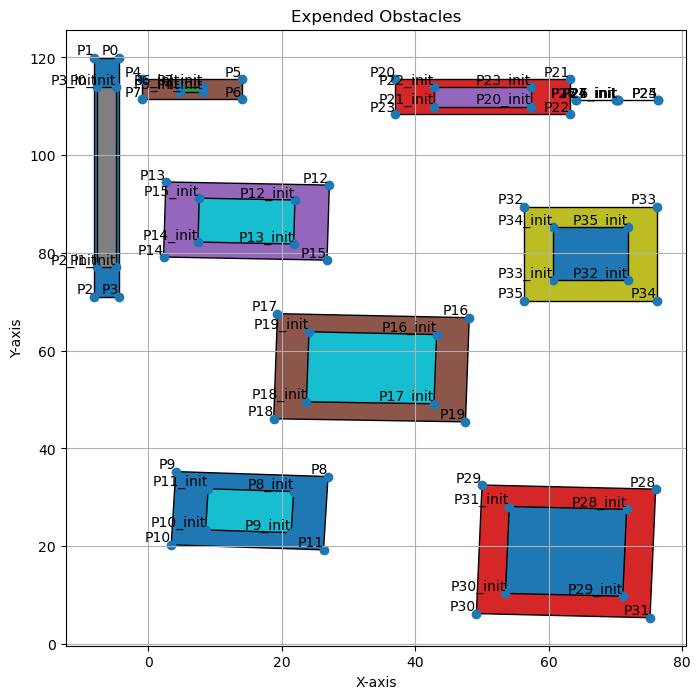

In [10]:
expended_corners = global_nav.grow_obstacles(object_corners, robot_size)
plt_glob.plot_expended_obstacles(object_corners, RandG, expended_corners)

We chose a map with printed obstacles. Thus these obstacles are seen only from top camera and not the robot sensors since these obstacles need to be avoided using a global planning. Moreover we decided to use a map whithout a grid. Hence the obvious choice of algorithm for global path was the Dijkstra algorithm.

First to create the adjacency list. We need to be able to find if two points are connected. I first needed to create a function that says if two segment lines intersect. To do so, I studied the theory about point orientation: (https://www.youtube.com/watch?v=wCR48FqkI4w ,https://www.geeksforgeeks.org/check-if-two-given-line-segments-intersect/) and created a function compute_orientation which returns the orientation of three given points. All points are defined as tuples corresponding to x and y coordinates. Then the intersect function finds if segments are connected, going through every case of orientation. 
The following plot is used to test the intersect function on 2 random segments: 

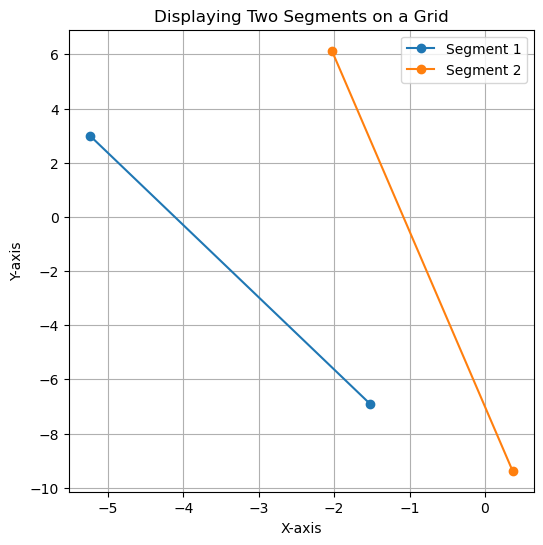

Are the segments crossing?  False


In [11]:
point1 = (random.uniform(-10, 10), random.uniform(-10, 10))
point2 = (random.uniform(-10, 10), random.uniform(-10, 10))
point3 = (random.uniform(-10, 10), random.uniform(-10, 10))
point4 = (random.uniform(-10, 10), random.uniform(-10, 10))
plt_glob.display_segments(point1, point2, point3, point4)
print("Are the segments crossing? ",global_nav.intersect (point1,point2,point3,point4))

Then using this. Two points are connected if we can draw a line between them without crossing any object segments. The function adjacency_list gows through every points and creates a new dictionnary saying which point is connected to which.

{'P0': (-4.315195521272443, 119.9398953828274), 'P1': (-8.113102757886258, 119.9398953828274), 'P2': (-8.113102757886256, 71.07348893839631), 'P3': (-4.315195521272442, 71.07348893839631), 'P4': (-1.0009927350262986, 115.56379817315633), 'P5': (14.0029047809154, 115.56379817315633), 'P6': (14.0029047809154, 111.39604886317254), 'P7': (-1.0009927350262986, 111.39604886317254), 'P8': (26.95542578830412, 34.23130753951853), 'P9': (4.124513530339463, 35.25563562025961), 'P10': (3.4461038484071613, 20.262000299869612), 'P11': (26.277016106371818, 19.23767221912853), 'P12': (27.151380058898802, 93.87913177232019), 'P13': (2.6455055887779446, 94.51717296977901), 'P14': (2.2941266332618113, 79.16102119135093), 'P15': (26.800001103382666, 78.52297999389211), 'P16': (48.11404427327882, 66.74881811484623), 'P17': (19.373868169742327, 67.56926200757613), 'P18': (18.807561845268026, 46.06188934213274), 'P19': (47.54773794880451, 45.43265003831297), 'P20': (37.04654539089228, 115.55594726707834), 'P

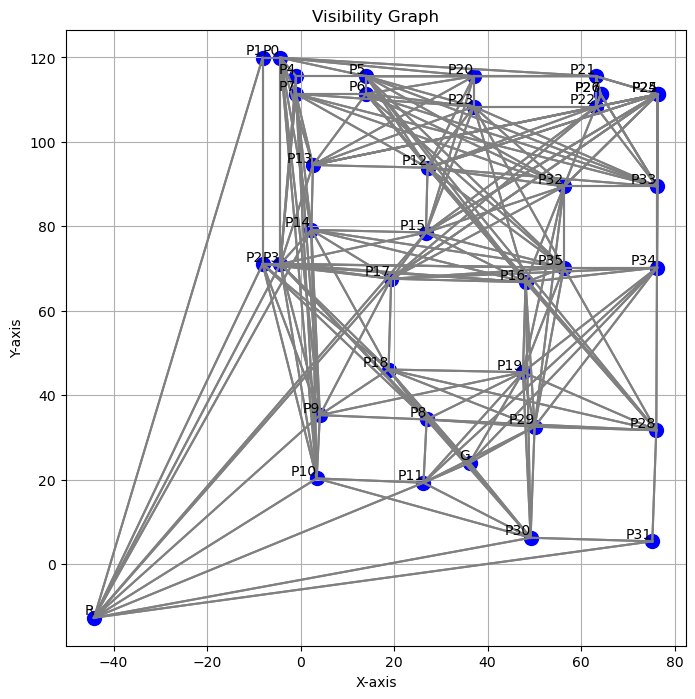

In [12]:
points_name2coord = global_nav.name2coord(expended_corners, RandG)
adjacent_list = global_nav.generate_adjacency_list(expended_corners, RandG)
plt_glob.plot_visibility_graph(adjacent_list, points_name2coord)

Once we have the adjacency list we can compute the Dijkstra algorithm that will be used in find_path to find the shortest route from robot position to goal.

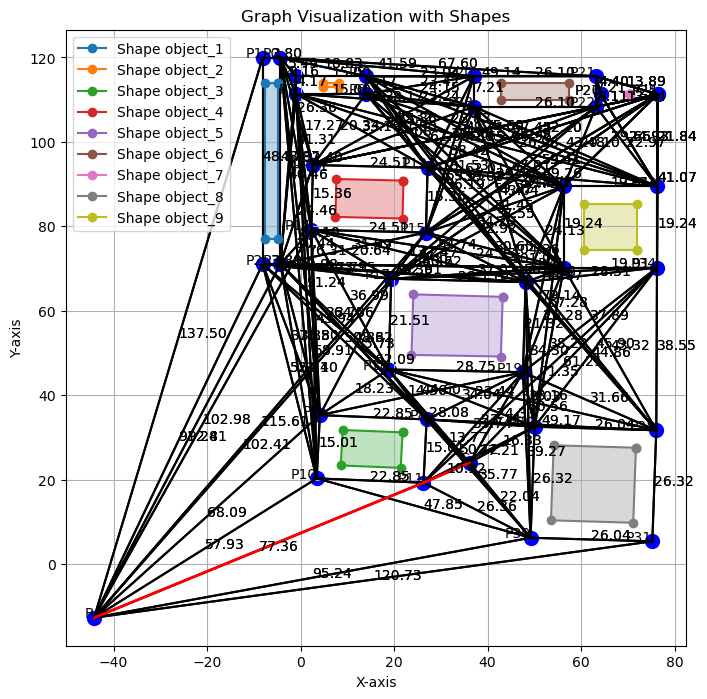

In [13]:
distances = global_nav.calculate_distances(adjacent_list, points_name2coord)
shortest_path = global_nav.find_path(adjacent_list, points_name2coord)
plt_glob.plot_graph_with_shapes(adjacent_list, points_name2coord, distances, shortest_path, object_corners)